# Import and check data

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('ad_click_dataset.csv')
df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [5]:
print("Duplicate values:")
print(df.duplicated().sum())
print("Missing values:")
print(df.isnull().sum().sum())
print("Missing values for each columns:")
print(df.isnull().sum())

Duplicate values:
2853
Missing values:
20241
Missing values for each columns:
id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


# Data Cleaning

In [6]:
df = df.drop_duplicates()
print("Duplicate values:")
print(df.duplicated().sum())
df.info()

Duplicate values:
0
<class 'pandas.core.frame.DataFrame'>
Index: 7147 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7147 non-null   int64  
 1   full_name         7147 non-null   object 
 2   age               3671 non-null   float64
 3   gender            3747 non-null   object 
 4   device_type       5419 non-null   object 
 5   ad_position       5404 non-null   object 
 6   browsing_history  3667 non-null   object 
 7   time_of_day       5435 non-null   object 
 8   click             7147 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 558.4+ KB


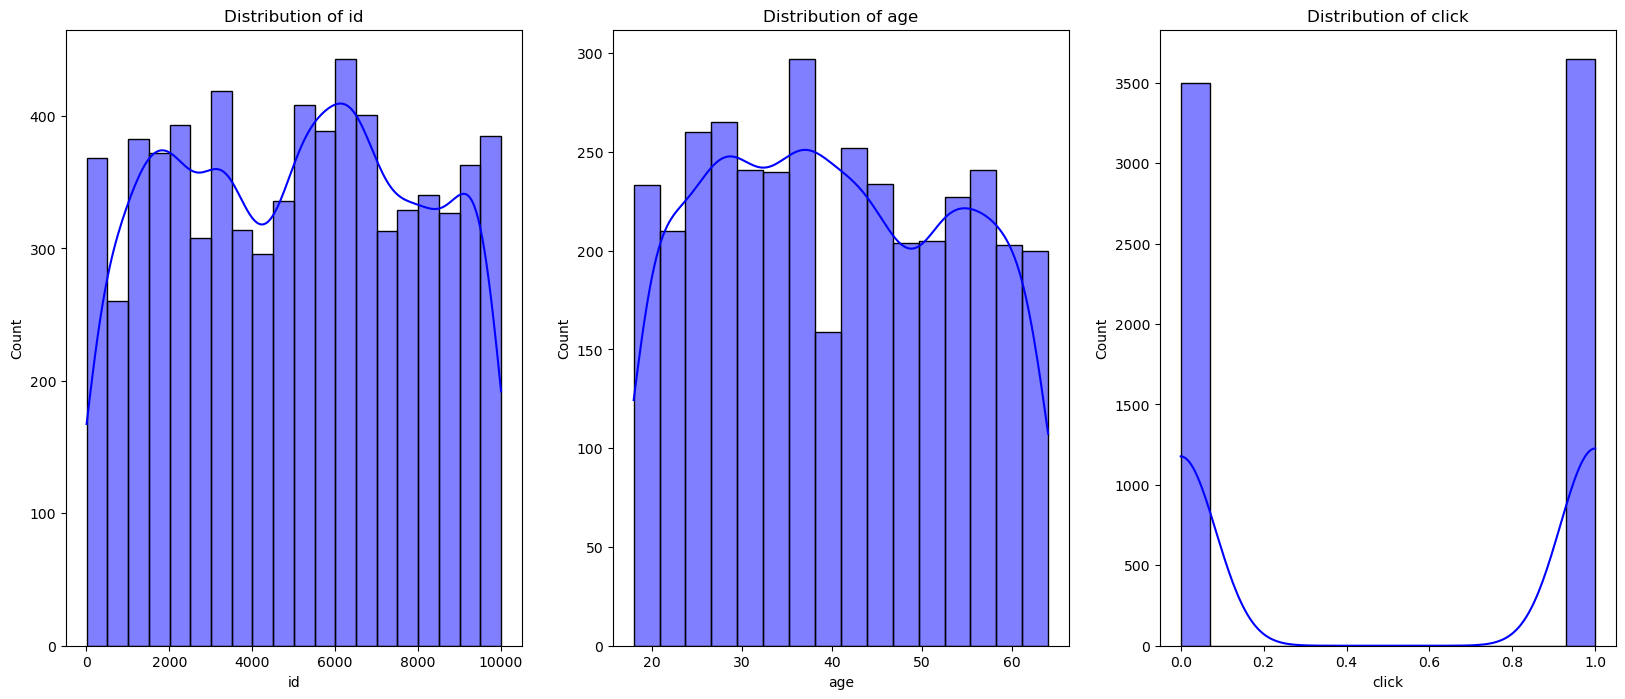

In [7]:
# to fill missing values first we need to see distribution for numerical columns
# We can fill missing values with Mode for object columns
plt.figure(figsize=(20,8))
for i, a  in enumerate(df.select_dtypes(exclude=['object']).columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data= df, x = a, kde = True, color = 'Blue')
    plt.title(f"Distribution of {a}")
plt.show()

In [8]:
# Since the figure show it's not normal distribution we gonna use median to fill numeric missing values
def missing_values(data):
    for i in data.select_dtypes(include=['object']).columns:
        if data[i].isnull().sum()>0:
            data[i] = data[i].fillna(data[i].mode()[0])
    for j in data.select_dtypes(exclude=['object']).columns:
        if data[j].isnull().sum()>0:
            data[j] = data[j].fillna(data[j].median())
    return data
missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7147 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7147 non-null   int64  
 1   full_name         7147 non-null   object 
 2   age               7147 non-null   float64
 3   gender            7147 non-null   object 
 4   device_type       7147 non-null   object 
 5   ad_position       7147 non-null   object 
 6   browsing_history  7147 non-null   object 
 7   time_of_day       7147 non-null   object 
 8   click             7147 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 558.4+ KB


C:\Users\sina\AppData\Local\Temp\ipykernel_12492\2905994683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].fillna(data[i].mode()[0])
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\2905994683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].fillna(data[j].median())


# EDA

C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1978959452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = j, palette = 'inferno')
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1978959452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = j, palette = 'inferno')
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1978959452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = j, palette = 'inferno')
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1978959452.py:5: FutureWarning: 

Passi

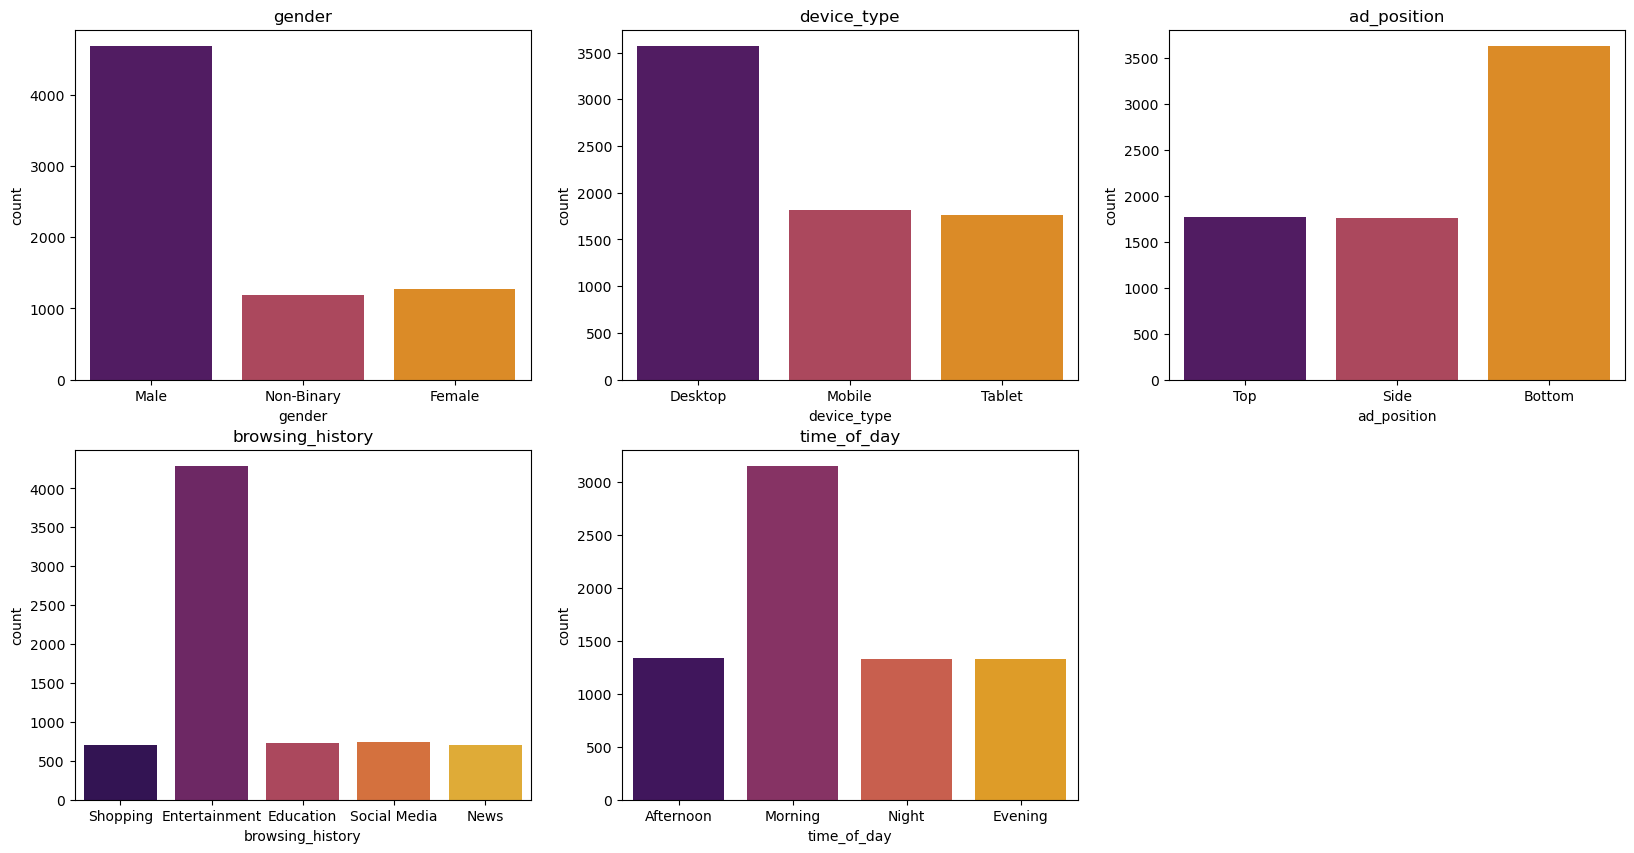

In [9]:
# Let's count each object data unleass full_name
plt.figure(figsize=(20,10))
for i, j in enumerate(df.iloc[:,3:-1]):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x = j, palette = 'inferno')
    plt.title(j)
plt.show()

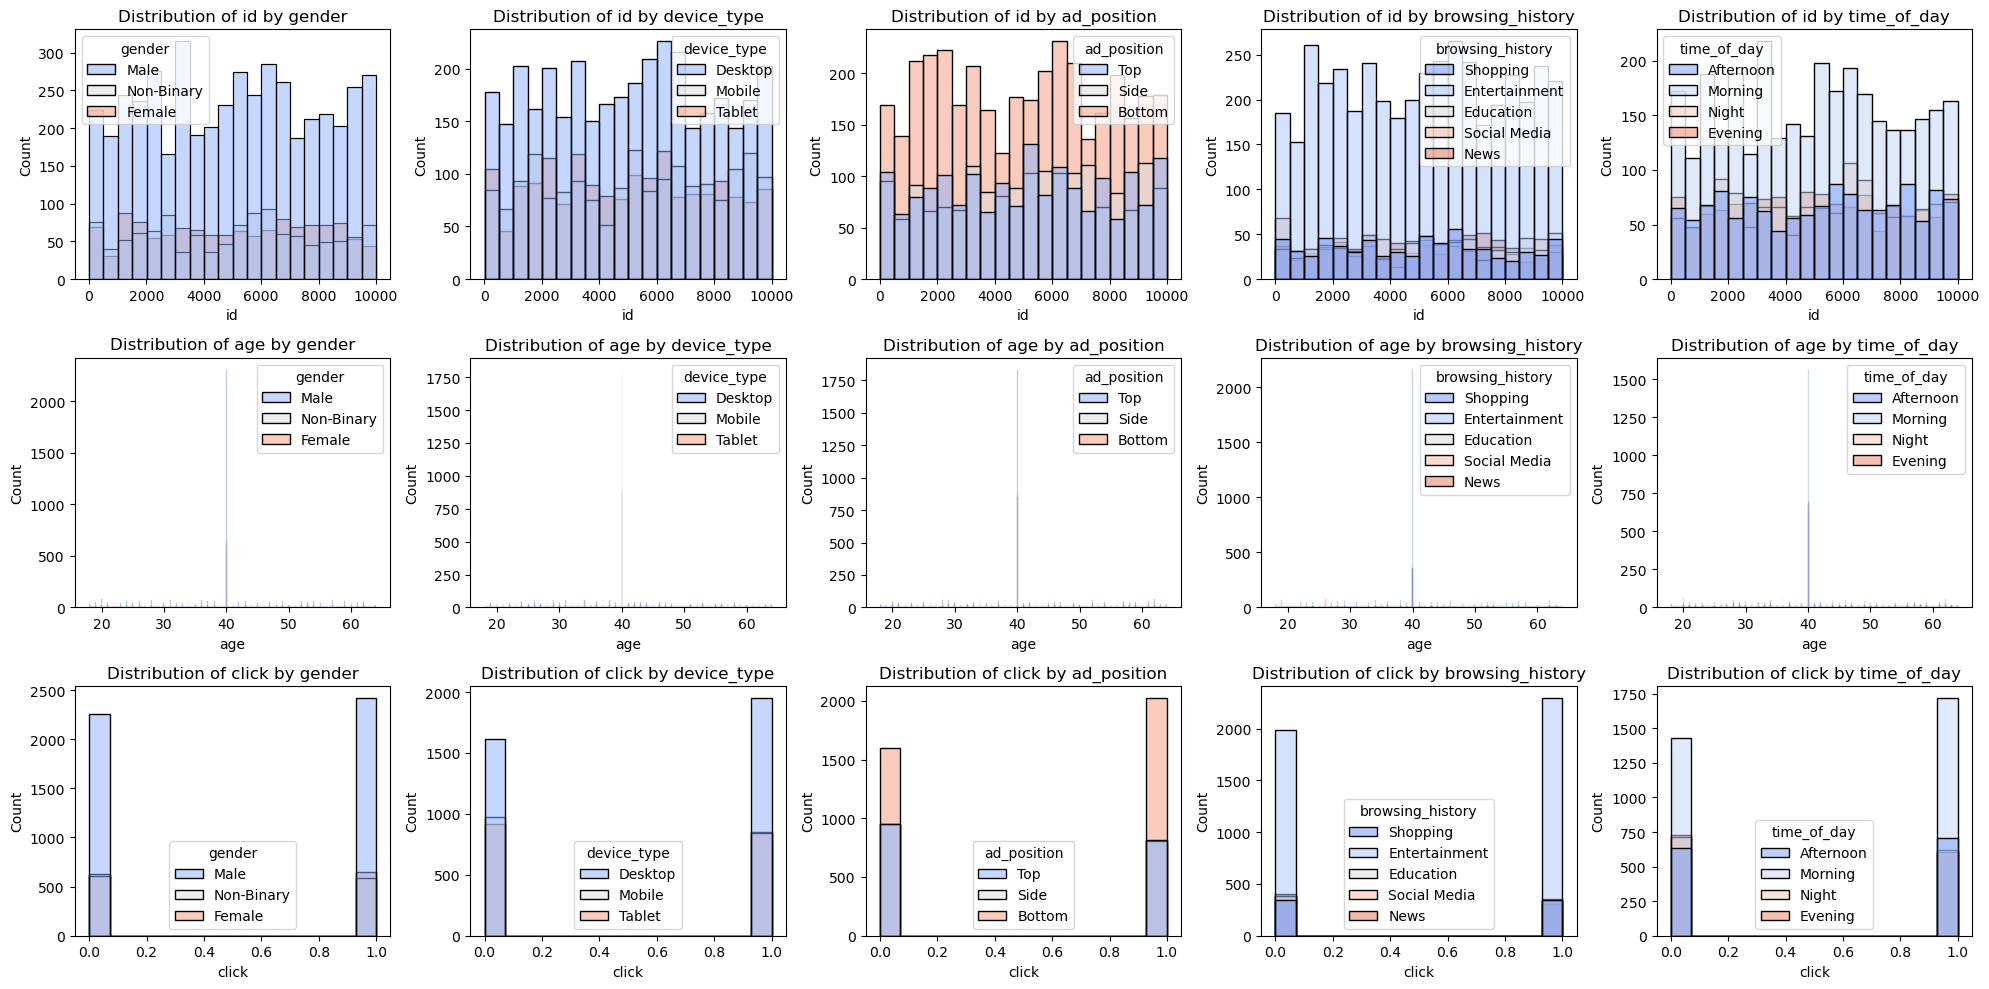

In [10]:
# let's see distribution based on category
plt.figure(figsize=(20,10))
num = 1
for j in df.select_dtypes(exclude=['object']).columns:
    for k in df.iloc[:,3:-1]:
        plt.subplot(3,5,num)
        sns.histplot(data = df, x = j, hue = k, palette = 'coolwarm')
        plt.title(f"Distribution of {j} by {k}")
        plt.tight_layout()
        num += 1
plt.show()

C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1370757340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1370757340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\sina\AppData\Local\Temp\ipykernel_12492\1370757340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

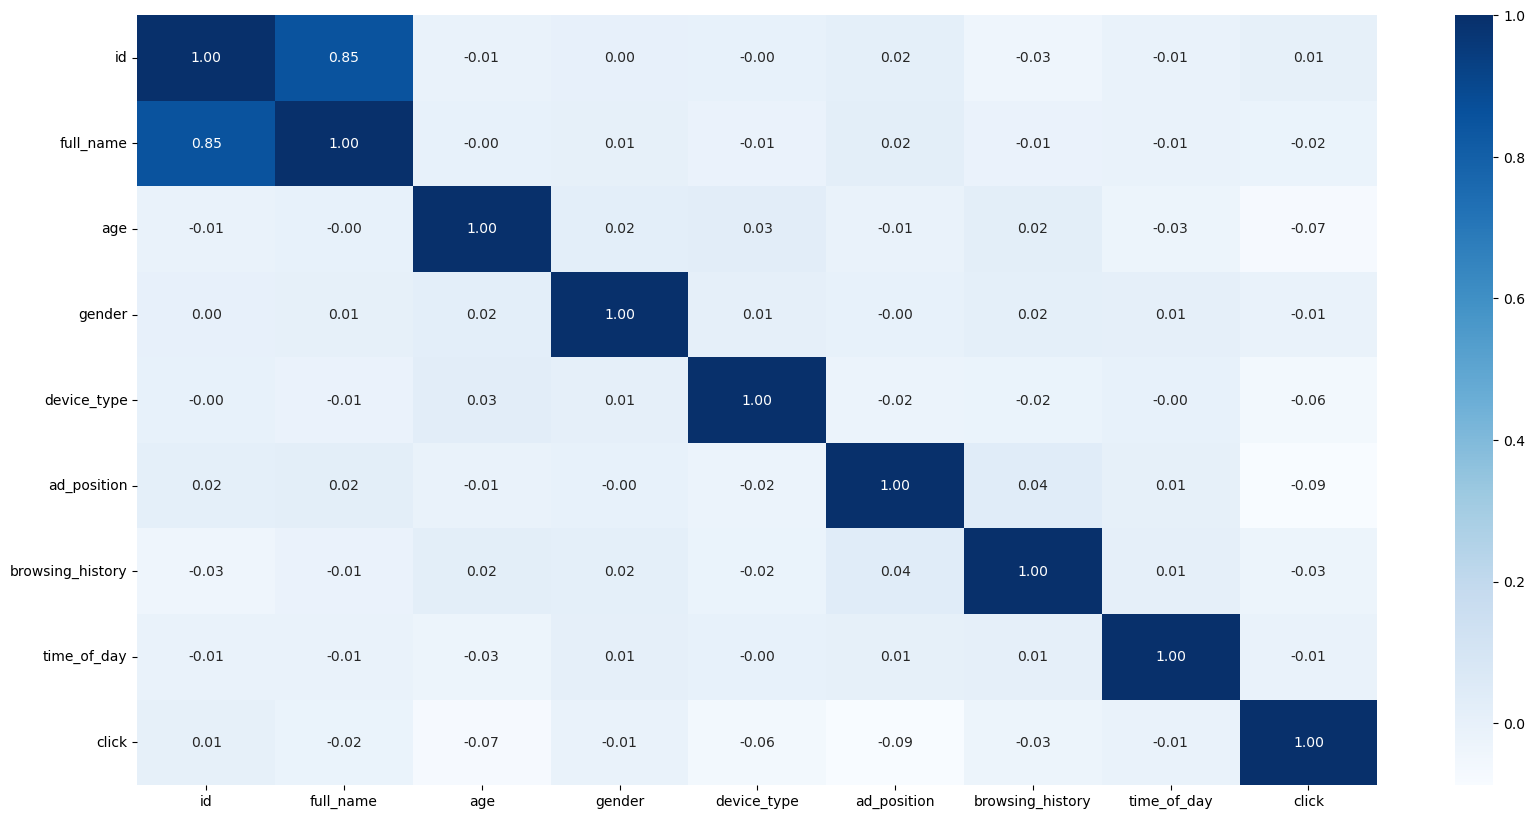

In [13]:
# convert non numeric into numeric columns and see correlation
plt.figure(figsize=(20,10))
le = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = le.fit_transform(df[i])
sns.heatmap(pd.DataFrame(df.corr()), annot = True, fmt = '.2f', cmap = 'Blues');

3d plots

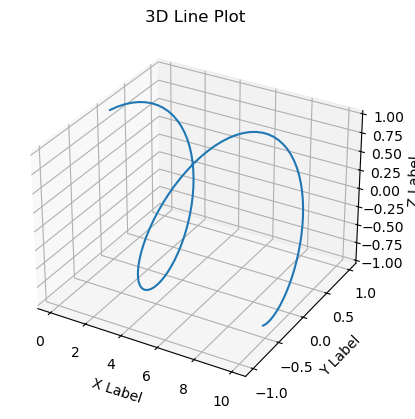

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)

ax.plot(x, y, z, label='3D Line')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Line Plot')
plt.show()

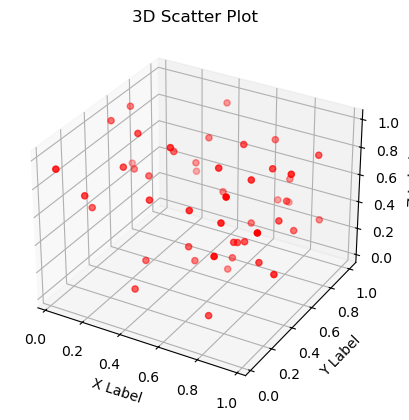

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

ax.scatter(x, y, z, color='red')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Scatter Plot')
plt.show()


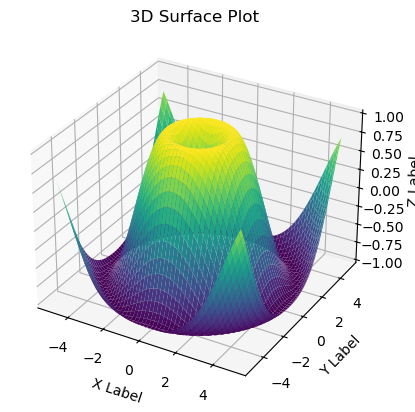

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Surface Plot')
plt.show()


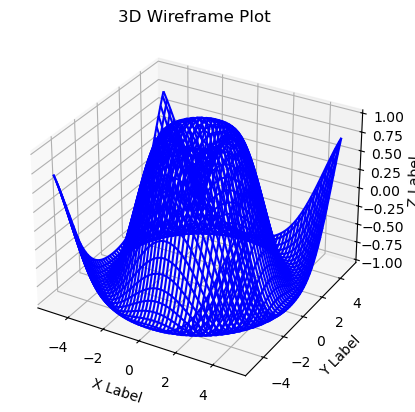

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Wireframe Plot')
plt.show()


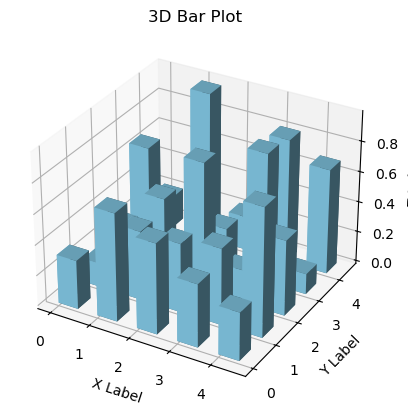

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(5)
y = np.arange(5)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()
z = np.zeros_like(x)
dx = dy = 0.5
dz = np.random.rand(25)

ax.bar3d(x, y, z, dx, dy, dz, color='skyblue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Bar Plot')
plt.show()


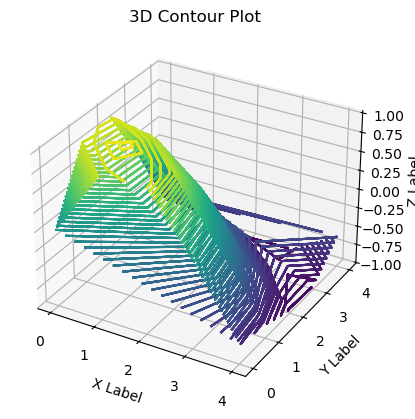

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Contour Plot')
plt.show()
